In [2]:
library(tidyverse)

Warning message:
"package 'tidyverse' was built under R version 3.4.4"-- Attaching packages --------------------------------------- tidyverse 1.2.1 --
√ ggplot2 2.2.1     √ purrr   0.2.4
√ tibble  1.4.2     √ dplyr   0.7.4
√ tidyr   0.8.0     √ stringr 1.3.0
√ readr   1.1.1     √ forcats 0.3.0
-- Conflicts ------------------------------------------ tidyverse_conflicts() --
x dplyr::filter() masks stats::filter()
x dplyr::lag()    masks stats::lag()


In [3]:
df <- read_tsv("no-pval-insensitive.tsv")
head(df)

Parsed with column specification:
cols(
  SiteID = col_character(),
  Chr = col_integer(),
  Loc = col_integer(),
  Gene = col_character(),
  Island = col_character(),
  after.avg.beta = col_double(),
  before.avg.beta = col_double(),
  after.vs.before.delta.beta = col_double(),
  after.vs.before.pvalue = col_double(),
  after.vs.before.fdr = col_double(),
  `Gene name` = col_character(),
  `Gene stable ID` = col_character(),
  `Chromosome/scaffold name` = col_character(),
  `Gene start (bp)` = col_integer(),
  `Gene end (bp)` = col_integer(),
  Strand = col_integer(),
  meth.pos.by.gene.start = col_integer()
)


SiteID,Chr,Loc,Gene,Island,after.avg.beta,before.avg.beta,after.vs.before.delta.beta,after.vs.before.pvalue,after.vs.before.fdr,Gene name,Gene stable ID,Chromosome/scaffold name,Gene start (bp),Gene end (bp),Strand,meth.pos.by.gene.start
chr17.5940,1,5940,AC108004.5,chr17:4829-9033,0.9404279,0.9647284,-0.024300483,0.3052511,0.9456410,AC108004.5,ENSG00000273288,17,4961,5048,-1,979
chr17.5946,1,5946,AC108004.5,chr17:3924-8144,0.9343210,0.9561717,-0.021850748,0.7184729,0.9999332,AC108004.5,ENSG00000273288,17,4961,5048,-1,985
chr17.5953,1,5953,AC108004.5,chr17:4829-9033,0.9339109,0.9242834,0.009627466,0.7951554,1.0000000,AC108004.5,ENSG00000273288,17,4961,5048,-1,992
chr17.5961,1,5961,AC108004.5,chr17:4829-9033,0.9209405,0.8847480,0.036192487,0.4941099,0.9685684,AC108004.5,ENSG00000273288,17,4961,5048,-1,1000
chr17.5979,1,5979,AC108004.5,chr17:3924-8144,0.9186138,0.9264646,-0.007850824,0.7767496,1.0000000,AC108004.5,ENSG00000273288,17,4961,5048,-1,1018
chr17.5994,1,5994,AC108004.5,chr17:4829-9033,0.9204279,0.9343629,-0.013935084,0.1942581,0.9456410,AC108004.5,ENSG00000273288,17,4961,5048,-1,1033


In [13]:
mid <- df %>% select(Gene, after.vs.before.delta.beta, meth.pos.by.gene.start) %>% filter(abs(meth.pos.by.gene.start) <= 2000)
head(mid, 20)

Gene,after.vs.before.delta.beta,meth.pos.by.gene.start
AC108004.5,-0.0243004834,979
AC108004.5,-0.0218507476,985
AC108004.5,0.0096274664,992
AC108004.5,0.0361924868,1000
AC108004.5,-0.0078508241,1018
AC108004.5,-0.0139350841,1033
AC108004.5,0.0142345209,1035
AC108004.5,-0.0223800764,1039
AC108004.5,0.1131384262,1050
AC108004.5,-0.0148065053,1058


In [14]:
mid <- mid %>% mutate(methylation = ifelse(after.vs.before.delta.beta >= 0, 'hyper', 'hypo'))

In [15]:
long <- mid %>% filter(Gene=="RASD1")

head(long)

Gene,after.vs.before.delta.beta,meth.pos.by.gene.start,methylation
RASD1,-0.098308495,-1359,hypo
RASD1,0.044991790,-929,hyper
RASD1,0.012438178,-903,hyper
RASD1,0.017466408,-838,hyper
RASD1,0.024018043,-738,hyper
RASD1,-0.007288118,-719,hypo


Warning message:
"Removed 1 rows containing missing values (geom_point)."

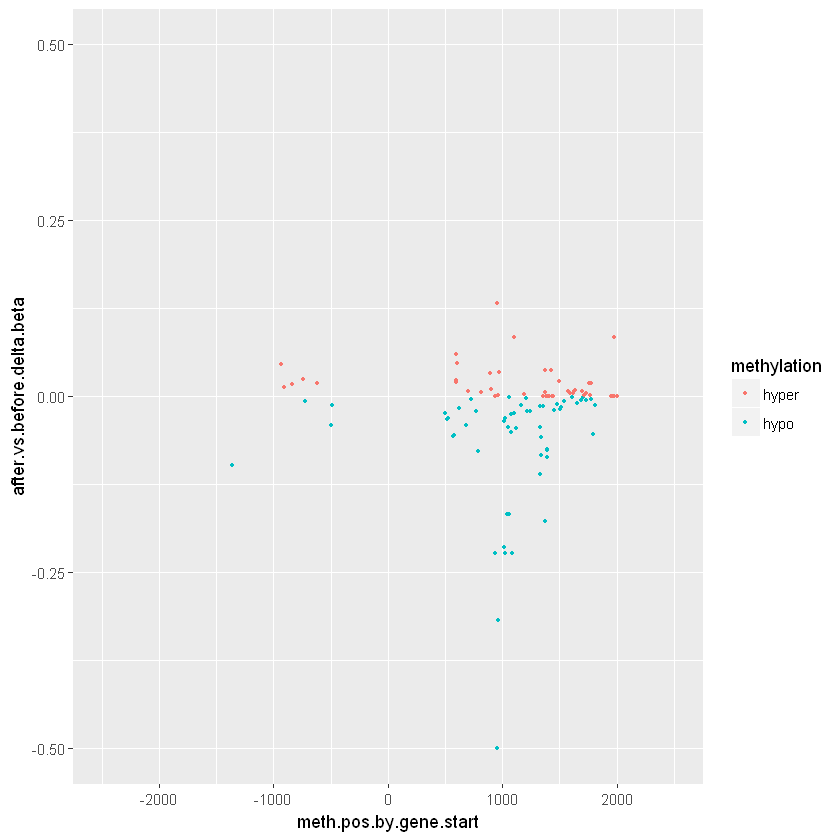

In [25]:
ggplot(long, aes(x=meth.pos.by.gene.start, y=after.vs.before.delta.beta, color=methylation)) + geom_point(size=.9) + scale_x_continuous(limits = c(-2500, 2500)) + scale_y_continuous(limits = c(-.5, .5)) # +  geom_line() # + geom_bar(aes(fill=methylation), stat="identity")

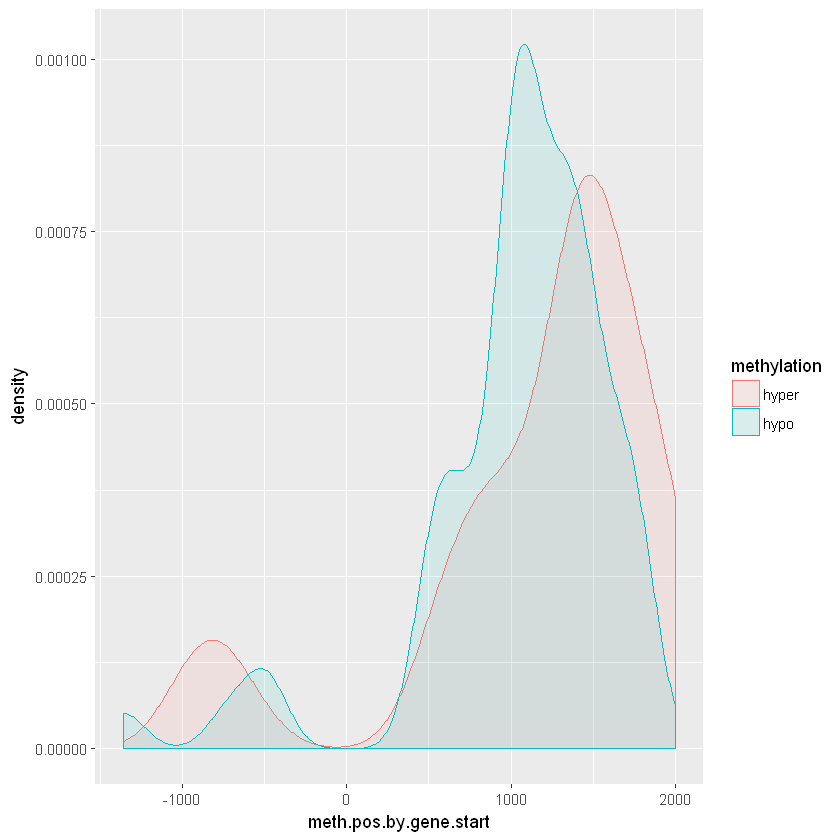

In [29]:
ggplot(long, aes(x=meth.pos.by.gene.start, color=methylation, fill=methylation)) + geom_density(alpha=0.1)